In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Read the CSV file.
ott_merge = pd.read_excel('ott.xlsx')

# Determine shape of classlist.
print(ott_merge.shape)
ott_merge.head()

(16744, 5)


,ID,Netflix,Hulu,Prime Video,Disney+
0,1,0,0,1,0
1,2,0,1,0,0
2,3,0,0,1,0
3,4,1,0,0,0
4,5,0,0,1,0


In [3]:
# Read the Excel file.
movies_merge = pd.read_csv('movies.csv')

# Determine shape of classlist.
print(movies_merge.shape)
movies_merge.head()

(16744, 11)


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
movies_final = movies_merge.merge(ott_merge, how='left', on='ID')
movies_final.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,1,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0


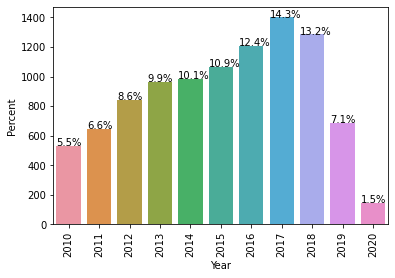

In [5]:
mov_ott_2010 = movies_final[movies_final['Year']>=2010]

ax = sns.countplot(x='Year', data=mov_ott_2010)

ax.set(ylabel='Percent')

total = len(mov_ott_2010['Year'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='IMDb', ylabel='Count'>

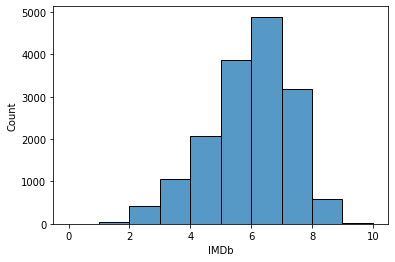

In [6]:
# Plot a histogram for the IMDb rating column.
sns.histplot(data=movies_final, x='IMDb', binwidth=1)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  


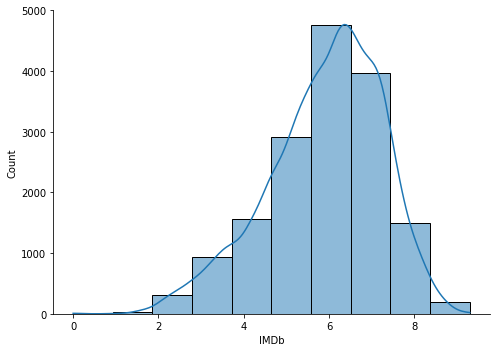

In [8]:
ax = sns.displot(data=movies_final, x='IMDb', bins=10,kind='hist', 
                 palette='GnBu', aspect=1.4, kde=True)

plt.show()